In [1]:
from numpy import *
import pandas as pd
import pylab as p
import matplotlib
from matplotlib.backends.backend_pdf import PdfPages
import vaex
import csv
from scipy.stats import norm #for gaussian
import os
import subprocess as sub
from tqdm import tqdm
%matplotlib inline

# Colormap of the velocity

In [2]:
# ---------------
# File directory
# ---------------

tmp_input_hel  = '/net/virgo01/data/users/virgini/rockstar/RC3/input/input_6d_5'

ds_input = vaex.from_ascii(tmp_input_hel)
df_input = ds_input.to_pandas_df()

In [48]:
# Bins for the stars

x_axis = arange(-0.4,  0.4, 0.025) #for heliocentric coordinate
y_axis = arange(-0.5,  0.3, 0.025)
z_axis = arange(-0.5,  0.3, 0.025)
delta  = 0.0125

x_axis.shape, y_axis.shape, z_axis.shape

bins = zeros((len(x_axis), len(y_axis), 4))

for j in tqdm(arange(len(y_axis)), desc='Loading..'):
    center_y = y_axis[j]
    for i in arange(len(x_axis)):
        center_x = x_axis[i]
        ds_input.select('(abs(y - %f) < %f) & (abs(x - %f) < %f)' %(center_y, delta, center_x, delta), name='my_bins')
        bins[i,j,0] = int(ds_input.count(selection='my_bins'))
        bins[i,j,1] = ds_input.mean('vx', selection='my_bins')
        bins[i,j,2] = ds_input.mean('vy', selection='my_bins')
        bins[i,j,3] = ds_input.mean('vz', selection='my_bins')

Loading..: 100%|██████████| 32/32 [01:13<00:00,  2.09s/it]


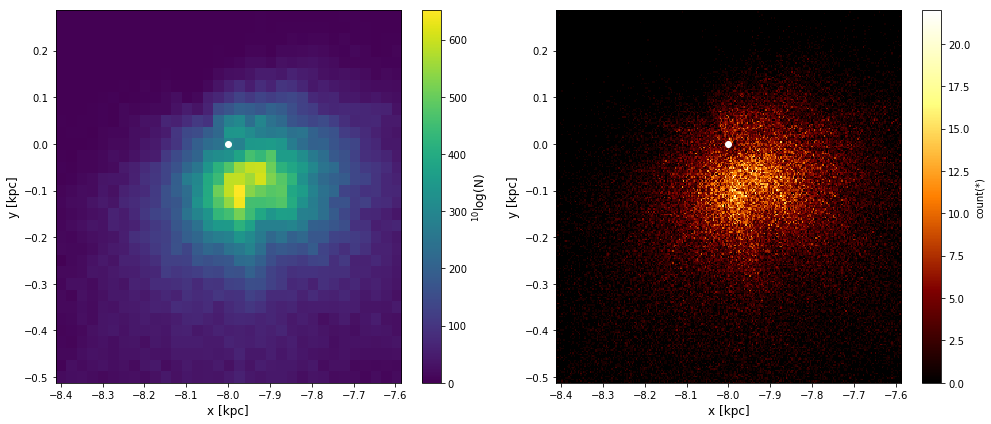

In [428]:
# --------------------------------
# Colormap of the number of stars
# --------------------------------

fig_n = p.figure(figsize=(14,6))
p.subplot(121)
extent = [min(x_axis)-delta, max(x_axis)+delta, min(y_axis)-delta, max(y_axis)+delta]
p.imshow((bins[:,:,0].T), origin='lower', extent=extent, aspect='auto')
p.colorbar().set_label(r'$^{10}\log$(N)', fontsize='large')
p.scatter(-8,0,c='w') #for galactocentric coordinate
# p.scatter(0,0,c='w')
p.xlabel('x [kpc]', fontsize='large'), p.ylabel('y [kpc]', fontsize='large')
p.subplot(122)
limit = min(x_axis)-delta, max(x_axis)+delta, min(y_axis)-delta, max(y_axis)+delta 
limits = [[min(x_axis)-delta, max(x_axis)+delta], [min(y_axis)-delta, max(y_axis)+delta]]
ds_input.select('(x >= %f) & (x <= %f) & (y >= %f) & (y <= %f)' %(limit), name='stars')
ds_input.plot('x', 'y', selection='stars', limits=limits)
p.xlabel('x [kpc]', fontsize='large'), p.ylabel('y [kpc]', fontsize='large')
p.scatter(-8,0, c='w') #for galactocentric coordinate
# p.scatter(0,0, c='w')
p.show(fig_n)
p.close(fig_n)

/Users/users/virgini/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':


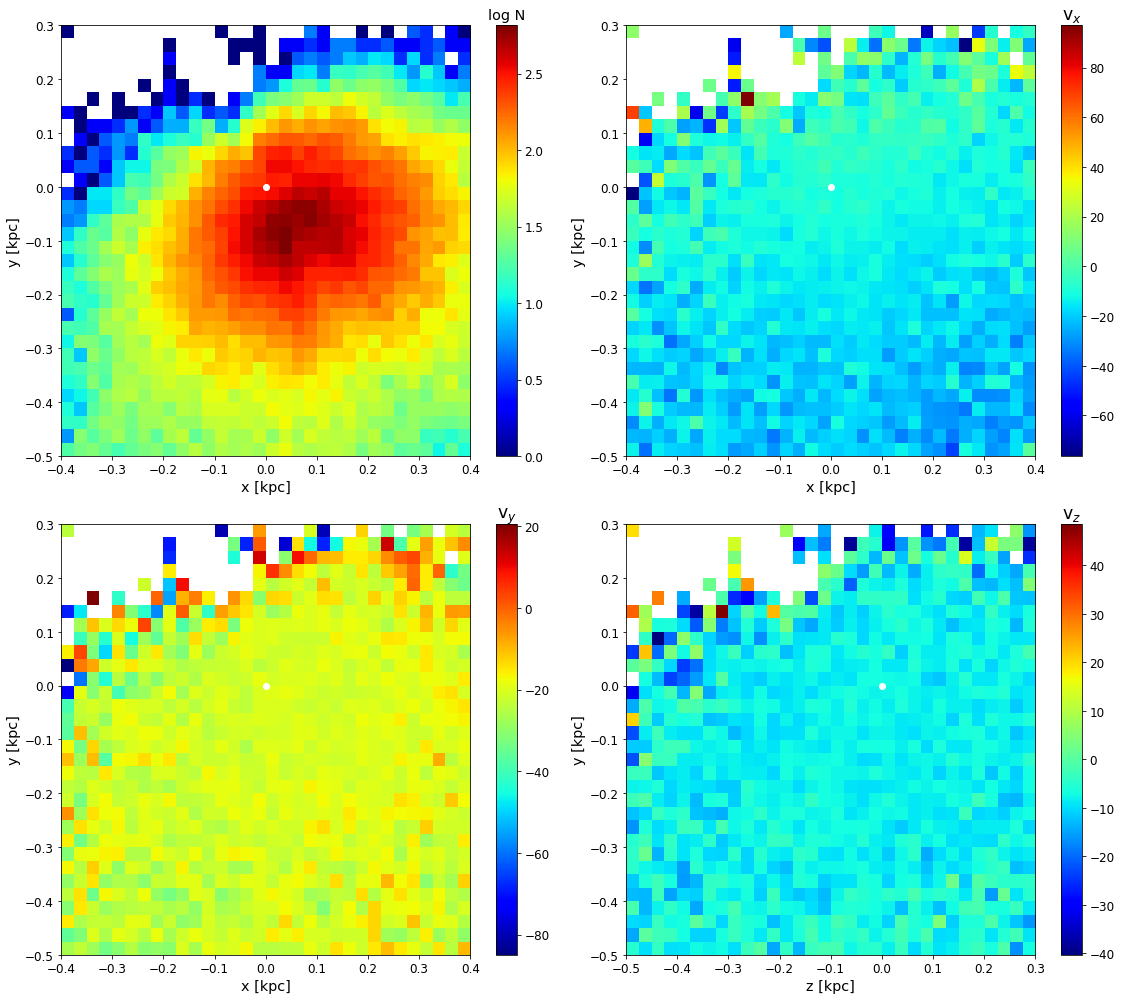

In [58]:
# ----------------------------------
# Colormap of the velocity of stars
# ----------------------------------

fig = p.figure(figsize=(16,14))

p.subplot(221)
extent = [min(x_axis), max(x_axis)+2*delta, min(y_axis), max(y_axis)+2*delta]
im = p.imshow(log10(bins[:,:,0].T), origin='lower', extent=extent, aspect='auto', cmap='jet')
cb = p.colorbar(im)
cb.ax.set_title('log N', fontsize='x-large')
cb.ax.tick_params(labelsize='large')
# p.scatter(-8,0,c='w') #for galactocentric coordinate
p.scatter(0,0,c='w')
p.xticks(fontsize='large'), p.yticks(fontsize='large')
p.xlabel('x [kpc]', fontsize='x-large'), p.ylabel('y [kpc]', fontsize='x-large')

p.subplot(222)
extent = [min(x_axis), max(x_axis)+2*delta, min(y_axis), max(y_axis)+2*delta]
im = p.imshow(bins[:,:,1].T, origin='lower', extent=extent, aspect='auto', cmap='jet') # vmin=-30, vmax=50, 
cb = p.colorbar(im)
cb.ax.set_title('v$_x$', fontsize='xx-large')
# p.scatter(-8,0,c='w') #for galactocentric coordinate
p.scatter(0,0,c='w')
p.xticks(fontsize='large'), p.yticks(fontsize='large')
p.xlabel('x [kpc]', fontsize='x-large'), p.ylabel('y [kpc]', fontsize='x-large')
cb.ax.tick_params(labelsize='large')

p.subplot(223)
extent = [min(x_axis), max(x_axis)+2*delta, min(y_axis), max(y_axis)+2*delta]
im = p.imshow(bins[:,:,2].T, origin='lower', extent=extent, aspect='auto', cmap='jet') #vmin=200, vmax=250, 
cb = p.colorbar(im)
cb.ax.set_title('v$_y$', fontsize='xx-large')
cb.ax.tick_params(labelsize='large')
# p.scatter(-8,0,c='w') #for galactocentric coordinate
p.scatter(0,0,c='w')
p.xticks(fontsize='large'), p.yticks(fontsize='large')
p.xlabel('x [kpc]', fontsize='x-large'), p.ylabel('y [kpc]', fontsize='x-large')

p.subplot(224)
extent = [min(z_axis), max(z_axis)+2*delta, min(y_axis), max(y_axis)+2*delta]
im = p.imshow(bins[:,:,3].T, origin='lower', extent=extent, aspect='auto', cmap='jet') #vmin=-30, vmax=50, 
cb = p.colorbar(im)
cb.ax.set_title('v$_z$', fontsize='xx-large')
cb.ax.tick_params(labelsize='large')
# p.scatter(0,0,c='w') #for galactocentric coordinate
p.scatter(0,0,c='w')
p.xticks(fontsize='large'), p.yticks(fontsize='large')
p.xlabel('z [kpc]', fontsize='x-large'), p.ylabel('y [kpc]', fontsize='x-large')

# fig.tight_layout(rect=[0.05,0.05,0.95,0.90])
fig.tight_layout()
fig.savefig('/net/virgo01/data/users/virgini/rockstar/RC3/output/vel-dis-color.png', format='png')
# pdf = PdfPages('/net/virgo01/data/users/virgini/rockstar/RC3/output/vel-dis-color.pdf')
# pdf.savefig(fig)
# pdf.close()

p.show()
p.close()

### Colormap of velocity of the substructures in galactocentric coordinate

In [410]:
ds = vaex.from_ascii('/net/virgo01/data/users/virgini/rockstar/RC3/output/b10-f90-n10-t70-halo')

In [411]:
vx_sun = 11.1
vy_sun = 12.24
vz_sun = 7.25
vy_cir = 220
R0 = -8

ds.add_column('vx_gal', ds.data.vx + vx_sun)
ds.add_column('vy_gal', ds.data.vy + vy_sun + vy_cir)
ds.add_column('vz_gal', ds.data.vz + vz_sun)
ds.add_column('x_gal', ds.data.x + R0)

In [412]:
# Bins for the substructures

x_axis = arange(-8.5, -7.5, 0.025) #for galactocentric coordinate
# x_axis = arange(-0.5,  0.5, 0.05) #for heliocentric coordinate
y_axis = arange(-0.5,  0.5, 0.025)
z_axis = arange(-0.5,  0.5, 0.025)
delta  = 0.0125

x_axis.shape, y_axis.shape, z_axis.shape

binsub = zeros((len(x_axis), len(y_axis), 4))

for j in tqdm(arange(len(y_axis)), desc='Loading..'):
    center_y = y_axis[j]
    for i in arange(len(x_axis)):
        center_x = x_axis[i]
        ds.select('(abs(y - %f) < %f) & (abs(x - %f) < %f)' %(center_y, delta, center_x, delta), name='my_bins')
        binsub[i,j,0] = int(ds.count(selection='my_bins'))
        binsub[i,j,1] = ds.mean('vx_gal', selection='my_bins')
        binsub[i,j,2] = ds.mean('vy_gal', selection='my_bins')
        binsub[i,j,3] = ds.mean('vz_gal', selection='my_bins')

Loading..: 100%|██████████| 40/40 [00:10<00:00,  4.36it/s]


In [416]:
binsub[:,:,0]

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [ ]:
# We need to convert the result into galactocentric coordinate to see how it behaves in the disk

vx_sun = 11.1
vy_sun = 12.24
vz_sun = 7.25
vy_cir = 220
R0 = -8

for i in tqdm(range(len(df_input)), desc='Loading..'):
    df_input.vx[i] = df_input.vx[i] + vx_sun
    df_input.vy[i] = df_input.vy[i] + vy_sun + vy_cir
    df_input.vz[i] = df_input.vx[i] + vz_sun
    df_input.x[i]  = df_input.x[i]  + R0

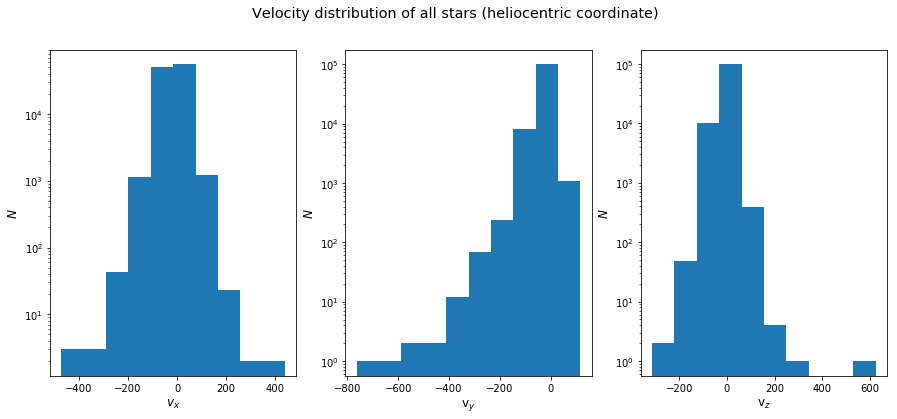

In [206]:
# histogram of velocity of all stars 

fig = p.figure(figsize=(15,6))
p.suptitle('Velocity distribution of all stars (heliocentric coordinate)', fontsize='x-large')
p.subplot(131), p.hist(df_input.vx, log=True), p.xlabel('$v_x$', fontsize='large'), p.ylabel('$N$', fontsize='large')
p.subplot(132), p.hist(df_input.vy, log=True), p.xlabel('v$_y$', fontsize='large'), p.ylabel('$N$', fontsize='large')
p.subplot(133), p.hist(df_input.vz, log=True), p.xlabel('v$_z$', fontsize='large'), p.ylabel('$N$', fontsize='large')
fig.tight_layout
p.show(fig)

# pdf = PdfPages('/net/virgo01/data/users/virgini/rockstar/RC3/output/velocity-dist-hel.pdf')
# pdf.savefig(fig)
# pdf.close()

In [ ]:
dg = vaex.from_ascii(tmp_input_gal)
dh = vaex.from_ascii(tmp_input_hel)

In [ ]:
bins = arange(-100, 100+5, 5)

fig1 = p.figure(figsize=(15,7))
p.suptitle('Velocity distribution of stars (heliocentric coordinate)', fontsize='x-large')

p.subplot(131), p.hist(dh.data.vx, bins=bins), p.axvline(0, c='r'), p.ylim(0,15000), p.xlabel('$v_x$', fontsize='large'), p.ylabel('$N$', fontsize='large')
p.subplot(132), p.hist(dh.data.vy, bins=bins), p.axvline(0, c='r'), p.ylim(0,15000), p.xlabel('v$_y$', fontsize='large')
p.subplot(133), p.hist(dh.data.vz, bins=bins), p.axvline(0, c='r'), p.ylim(0,15000), p.xlabel('v$_z$', fontsize='large')

# fig1.tight_layout(rect=[0,0,1,0.95])
p.show(fig1)

fig2 = p.figure(figsize=(15,7))
p.suptitle('Velocity distribution of substructures (heliocentric coordinate)', fontsize='x-large')

p.subplot(131), p.hist(ds.data.vx, bins=bins), p.axvline(0, c='r'), p.ylim(0,25), p.xlabel('$v_x$', fontsize='large'), p.ylabel('$N$', fontsize='large')
p.subplot(132), p.hist(ds.data.vy, bins=bins), p.axvline(0, c='r'), p.ylim(0,25), p.xlabel('v$_y$', fontsize='large')
p.subplot(133), p.hist(ds.data.vz, bins=bins), p.axvline(0, c='r'), p.ylim(0,25), p.xlabel('v$_z$', fontsize='large')

# fig2.tight_layout(rect=[0,0,1,0.95])
p.show(fig2)

pdf = PdfPages('/net/virgo01/data/users/virgini/rockstar/RC3/output/vel-dist-hel-star-sub.pdf')
pdf.savefig(fig1)
pdf.savefig(fig2)
pdf.close()

# Velocity distribution of stars and substructures

## 1. Heliocentric coordinate

In [2]:
# dataset of stars from the original TGASxRAVE dataset (heliocentric)
dh = vaex.open('/net/virgo01/data/users/virgini/rockstar/RC3/data/data_6d_cut')

# dataset of substructure from the output of Rockstar
ds1 = vaex.from_ascii('/net/virgo01/data/users/virgini/rockstar/RC3/output/b05-f40-n10-t70-halo')
ds2 = vaex.from_ascii('/net/virgo01/data/users/virgini/rockstar/RC3/output/b05-f80-n10-t70-halo')
ds3 = vaex.from_ascii('/net/virgo01/data/users/virgini/rockstar/RC3/output/b20-f40-n10-t70-halo')
ds4 = vaex.from_ascii('/net/virgo01/data/users/virgini/rockstar/RC3/output/b20-f80-n10-t70-halo')

In [3]:
# In order to set the right bins, we need to see the typical uncertainty in the velocity (vx, vy, vz)
print(dh.data.vx_uncertainty.mean(), dh.data.vx_uncertainty.std())
print(dh.data.vy_uncertainty.mean(), dh.data.vy_uncertainty.std())
print(dh.data.vz_uncertainty.mean(), dh.data.vz_uncertainty.std())

3.73060044383 3.52856228238
3.24897097596 3.43921696029
2.5183199019 2.14407871297


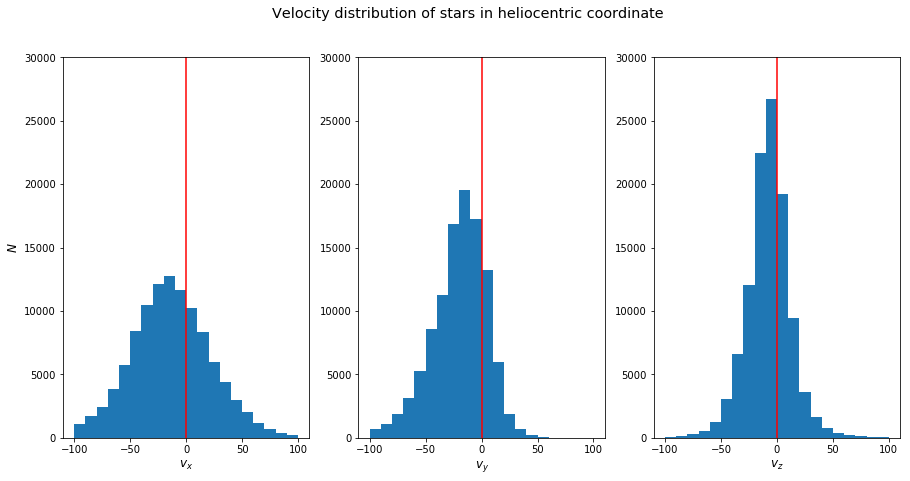

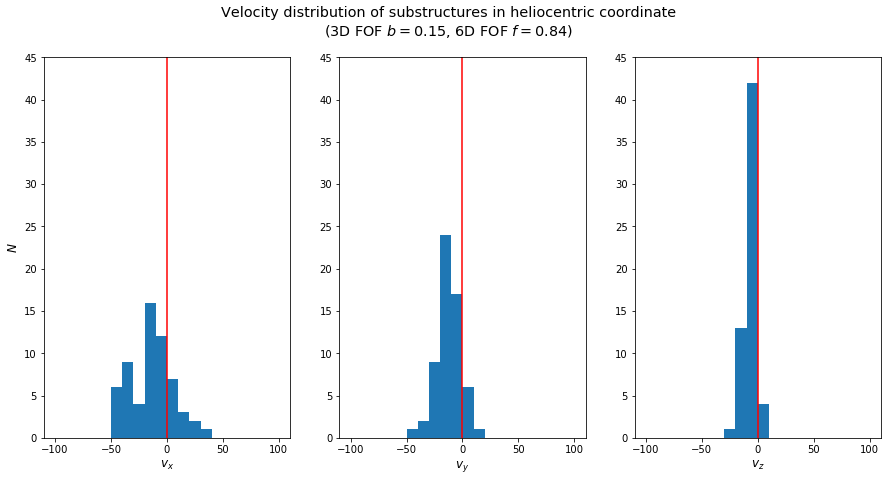

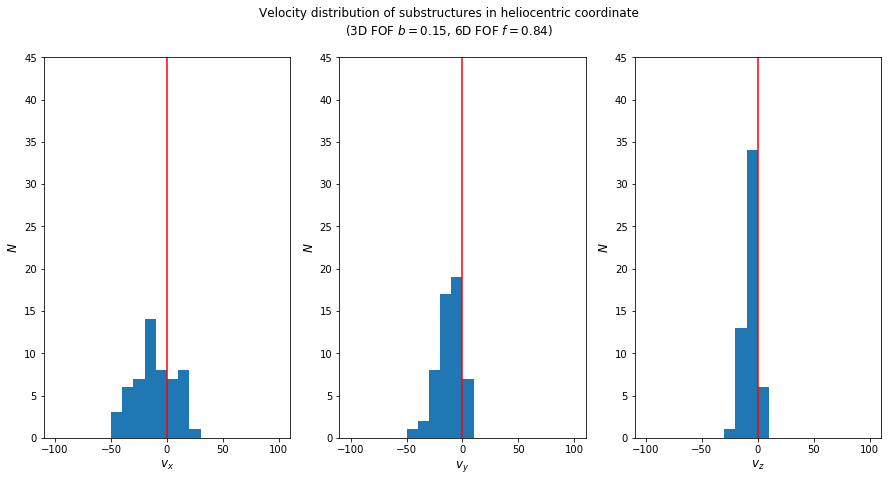

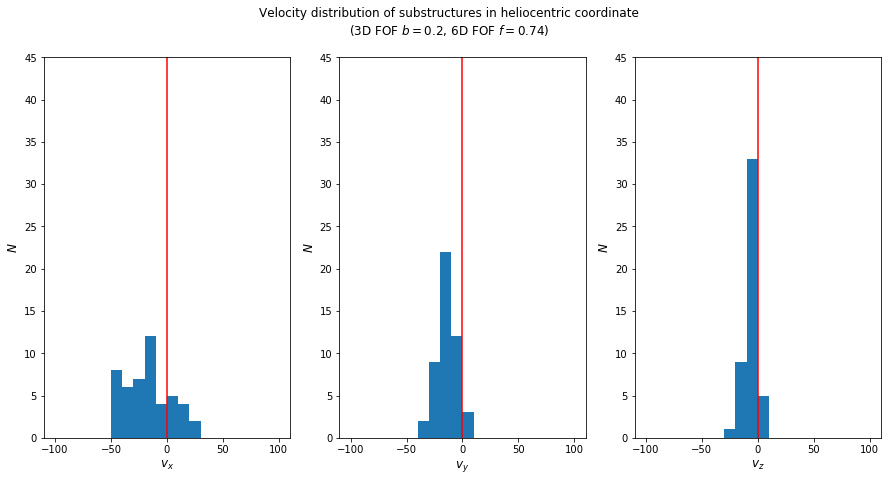

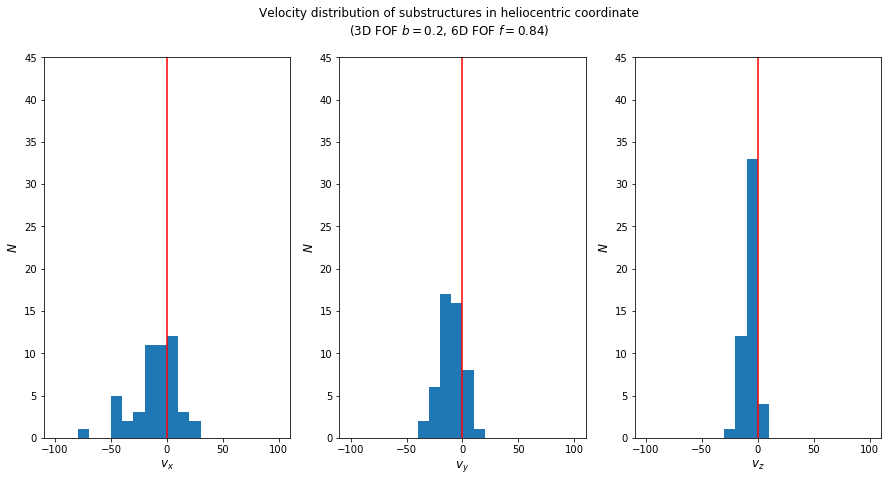

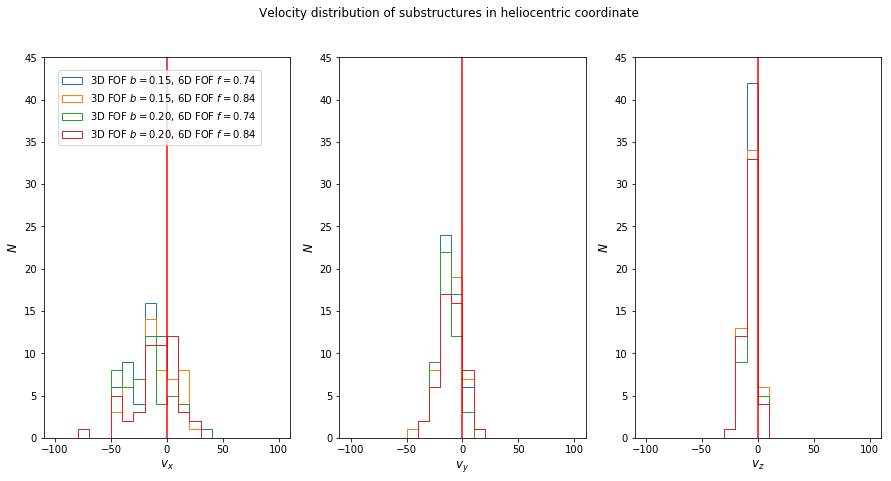

In [138]:
bins = arange(-100, 100+10, 10)
binsy= arange(0, 320+5, 5)

data0 = [dh.data.vx, dh.data.vy, dh.data.vz]
data1 = [ds1.data.vx, ds1.data.vy, ds1.data.vz]
data2 = [ds2.data.vx, ds2.data.vy, ds2.data.vz]
data3 = [ds3.data.vx, ds3.data.vy, ds3.data.vz]
data4 = [ds4.data.vx, ds4.data.vy, ds4.data.vz]
xlabel=[r'$v_x$', r'$v_y$', r'$v_z$']
ylabel=[r'$N$',' ',' ']
figsize=(15,7)

fig0 = p.figure(figsize=figsize)
fig0.suptitle('Velocity distribution of stars in heliocentric coordinate', fontsize='x-large')
for i in range(3):
    fig0.add_subplot(1,3,i+1)
    p.hist(data0[i], bins=bins)
    p.axvline(0, c='r')
    p.ylim(0,30000)
    p.xlabel(xlabel[i], fontsize='large')
    p.ylabel(ylabel[i], fontsize='large')
p.show(fig0)


fig1 = p.figure(figsize=figsize)
fig1.suptitle('Velocity distribution of substructures in heliocentric coordinate\n(3D FOF $b=0.15$, 6D FOF $f=0.84$)', \
             fontsize='x-large')
for i in range(3):
    fig1.add_subplot(1,3,i+1)
    p.hist(data1[i], bins=bins)
    p.axvline(0, c='r')
    p.ylim(0,45)
    p.xlabel(xlabel[i], fontsize='large')
    p.ylabel(ylabel[i], fontsize='large')
p.show(fig1)

fig2 = p.figure(figsize=figsize)
fig2.suptitle('Velocity distribution of substructures in heliocentric coordinate\n(3D FOF $b=0.15$, 6D FOF $f=0.84$)')
for i in range(3):
    fig2.add_subplot(1,3,i+1)
    p.hist(data2[i], bins=bins)
    p.axvline(0, c='r')
    p.ylim(0,45)
    p.xlabel(xlabel[i], fontsize='large')
    p.ylabel(r'$N$', fontsize='large')
p.show(fig2)

fig3 = p.figure(figsize=figsize)
fig3.suptitle('Velocity distribution of substructures in heliocentric coordinate\n(3D FOF $b=0.2$, 6D FOF $f=0.74$)')
for i in range(3):
    fig3.add_subplot(1,3,i+1)
    p.hist(data3[i], bins=bins)
    p.axvline(0, c='r')
    p.ylim(0,45)
    p.xlabel(xlabel[i], fontsize='large')
    p.ylabel(r'$N$', fontsize='large')
p.show(fig3)

fig4 = p.figure(figsize=figsize)
fig4.suptitle('Velocity distribution of substructures in heliocentric coordinate\n(3D FOF $b=0.2$, 6D FOF $f=0.84$)')
for i in range(3):
    fig4.add_subplot(1,3,i+1)
    p.hist(data4[i], bins=bins)
    p.axvline(0, c='r')
    p.ylim(0,45)
    p.xlabel(xlabel[i], fontsize='large')
    p.ylabel(r'$N$', fontsize='large')
p.show(fig4)

fig5 = p.figure(figsize=figsize)
fig5.suptitle('Velocity distribution of substructures in heliocentric coordinate')
for i in range(3):
    fig5.add_subplot(1,3,i+1)
    p.hist(data1[i], bins=bins, histtype='step', label='3D FOF $b=0.15$, 6D FOF $f=0.74$')
    p.hist(data2[i], bins=bins, histtype='step', label='3D FOF $b=0.15$, 6D FOF $f=0.84$')
    p.hist(data3[i], bins=bins, histtype='step', label='3D FOF $b=0.20$, 6D FOF $f=0.74$')
    p.hist(data4[i], bins=bins, histtype='step', label='3D FOF $b=0.20$, 6D FOF $f=0.84$')
    p.axvline(0, c='r')
    p.ylim(0,45)
    p.xlabel(xlabel[i], fontsize='large')
    p.ylabel(r'$N$', fontsize='large')
p.legend(bbox_to_anchor=(-1.5, 0.98))
p.show(fig5)

# pdf = PdfPages('/net/virgo01/data/users/virgini/rockstar/RC3/output/vel-dist-cir-star-sub.pdf')
# pdf.savefig(fig1)
# pdf.savefig(fig2)
# pdf.close()

## For thesis

#### 1. Velocity distribution for stars

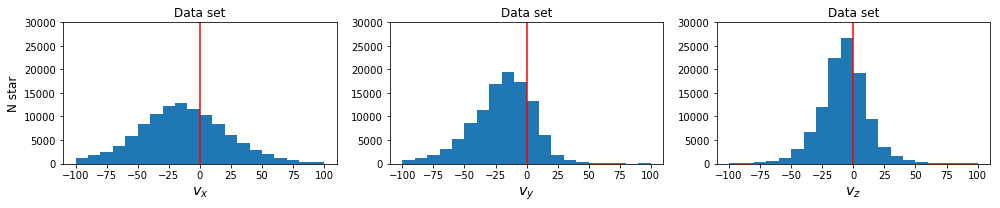

In [39]:
data0 = [dh.data.vx, dh.data.vy, dh.data.vz]
bins = arange(-100, 100+10, 10)
xlabel=[r'$v_x$', r'$v_y$', r'$v_z$']
ylabel=['N star',' ',' ']

fig = p.figure(figsize=(14,3))
gs = p.GridSpec(nrows=1, ncols=3)
for i in range(3):
    fig.add_subplot(gs[i])
    p.hist(data0[i], bins=bins)
    p.axvline(0, c='r')
    p.ylim(0,30000)
    p.xlabel(xlabel[i], fontsize='x-large')
    p.ylabel(ylabel[i], fontsize='large')
    p.title('Data set', fontsize='large')
fig.tight_layout()
p.savefig('/net/virgo01/data/users/virgini/rockstar/RC3/output/Vel-dis-stars.png', format='png')
p.show()

#### 2. Velocity distribution for substructures

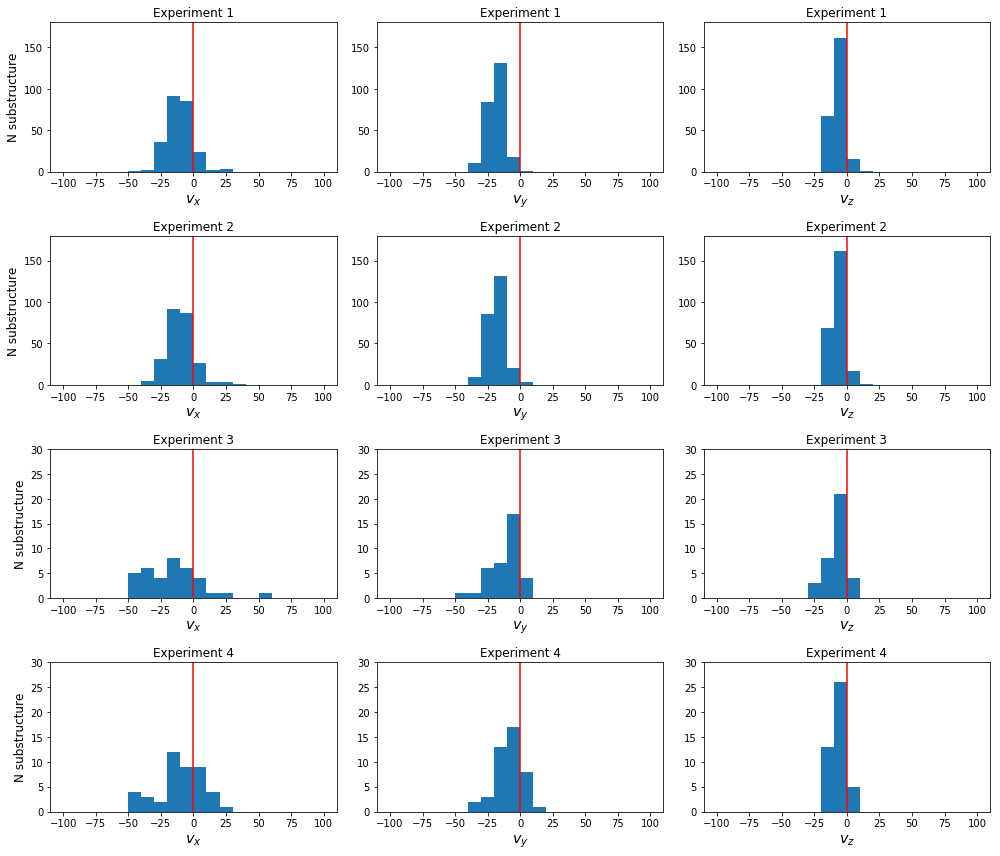

In [38]:
bins = arange(-100, 100+10, 10)

data1 = [ds1.data.vx, ds1.data.vy, ds1.data.vz]
data2 = [ds2.data.vx, ds2.data.vy, ds2.data.vz]
data3 = [ds3.data.vx, ds3.data.vy, ds3.data.vz]
data4 = [ds4.data.vx, ds4.data.vy, ds4.data.vz]
xlabel=[r'$v_x$', r'$v_y$', r'$v_z$']
ylabel=['N substructure',' ',' ']
figsize=(14,12)

fig = p.figure(figsize=figsize)
gs  = p.GridSpec(nrows=4, ncols=3)

data_all = [data1, ' ', ' ', data2, ' ', ' ', data3, ' ', ' ', data4]
title = ['Experiment 1', 'Experiment 1', 'Experiment 1', 'Experiment 2', 'Experiment 2', 'Experiment 2', \
         'Experiment 3', 'Experiment 3', 'Experiment 3', 'Experiment 4', 'Experiment 4', 'Experiment 4',]

for k in [0,3]:
    data = data_all[k]
    for i in range(3):
        fig.add_subplot(gs[k+i])
        p.hist(data[i], bins=bins)
        p.axvline(0, c='r')
        p.ylim(0,180)
        p.xlabel(xlabel[i], fontsize='x-large')
        p.ylabel(ylabel[i], fontsize='large')
        p.title(title[k], fontsize='large')
for k in [6,9]:
    data = data_all[k]
    for i in range(3):
        fig.add_subplot(gs[k+i])
        p.hist(data[i], bins=bins)
        p.axvline(0, c='r')
        p.ylim(0,30)
        p.xlabel(xlabel[i], fontsize='x-large')
        p.ylabel(ylabel[i], fontsize='large')    
        p.title(title[k], fontsize='large')        
fig.tight_layout()
fig.savefig('/net/virgo01/data/users/virgini/rockstar/RC3/output/Vel-dis-subs.png', format='png')
p.show(fig)

## 2. Heliocentric + correction with circular velocity

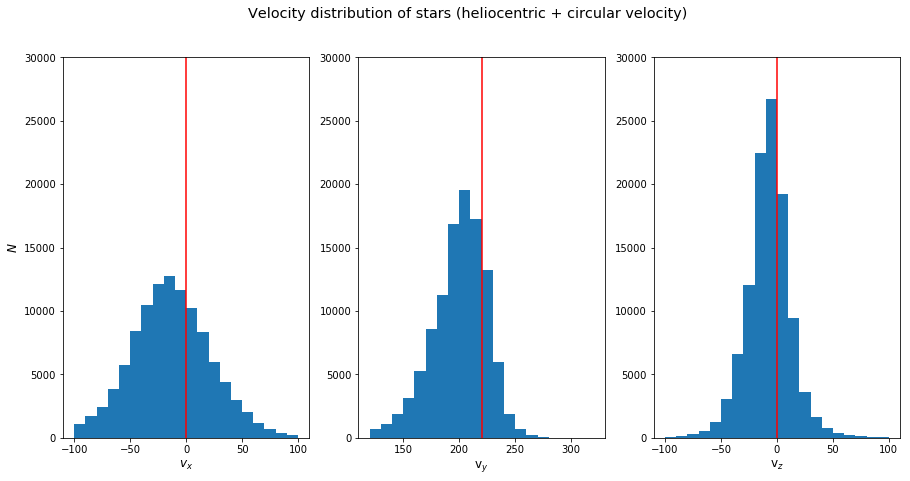

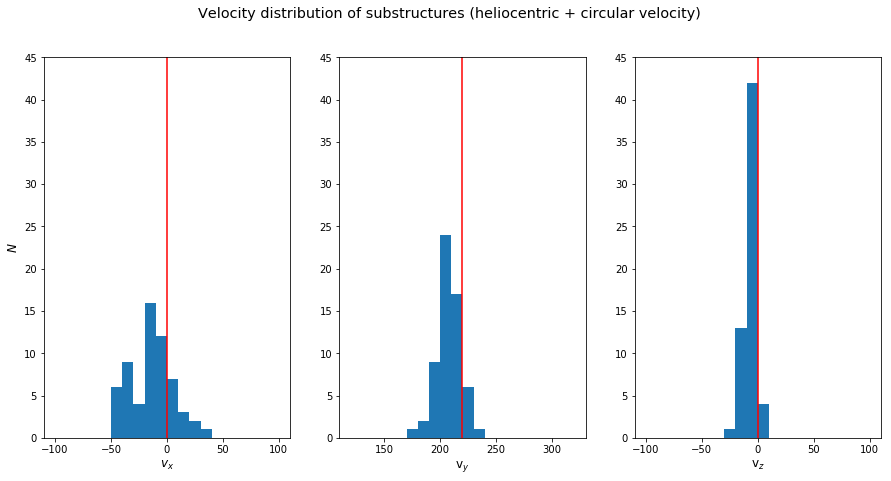

In [116]:
vy_cir = 220
bins = arange(-100, 100+10, 10)
binsy= arange(120, 320+10, 10)

fig6 = p.figure(figsize=(15,7))
p.suptitle('Velocity distribution of stars (heliocentric + circular velocity)', fontsize='x-large')
p.subplot(131), p.hist(dh.data.vx, bins=bins), p.axvline(0, c='r'), p.ylim(0,30000), p.xlabel('$v_x$', fontsize='large'), p.ylabel('$N$', fontsize='large')
p.subplot(132), p.hist(dh.data.vy+vy_cir, bins=binsy), p.axvline(220, c='r'), p.ylim(0,30000), p.xlabel('v$_y$', fontsize='large')
p.subplot(133), p.hist(dh.data.vz, bins=bins), p.axvline(0, c='r'), p.ylim(0,30000), p.xlabel('v$_z$', fontsize='large')
p.show(fig6)

fig7 = p.figure(figsize=(15,7))
p.suptitle('Velocity distribution of substructures (heliocentric + circular velocity)', fontsize='x-large')
p.subplot(131), p.hist(ds1.data.vx, bins=bins), p.axvline(0, c='r'), p.ylim(0,45), p.xlabel('$v_x$', fontsize='large'), p.ylabel('$N$', fontsize='large')
p.subplot(132), p.hist(ds1.data.vy+vy_cir, bins=binsy), p.axvline(220, c='r'), p.ylim(0,45), p.xlabel('v$_y$', fontsize='large')
p.subplot(133), p.hist(ds1.data.vz, bins=bins), p.axvline(0, c='r'), p.ylim(0,45), p.xlabel('v$_z$', fontsize='large')
p.show(fig7)

# pdf = PdfPages('/net/virgo01/data/users/virgini/rockstar/RC3/output/vel-dist-cir-star-sub.pdf')
# pdf.savefig(fig1)
# pdf.savefig(fig2)
# pdf.close()

## 3. Galactocentric coordinate

In [111]:
# We need to convert the result into galactocentric coordinate to see how it behaves in the disk
vx_sun = 11.1
vy_sun = 12.24
vz_sun = 7.25
vy_cir = 220
R0 = -8

for i in tqdm(range(len(ds)), desc='Loading..'):
    df.vx[i] = df.vx[i] + vx_sun
    df.vy[i] = df.vy[i] + vy_sun + vy_cir
    df.vz[i] = df.vx[i] + vz_sun
    df.x[i]  = df.x[i]  + R0

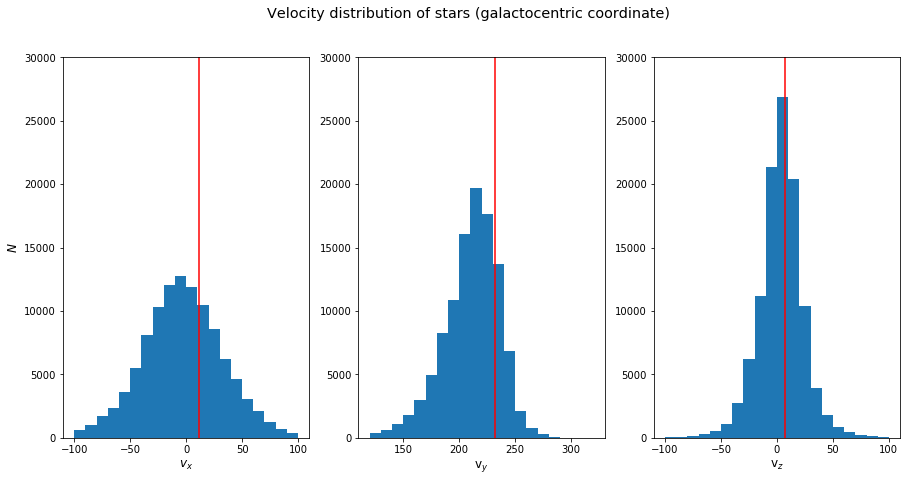

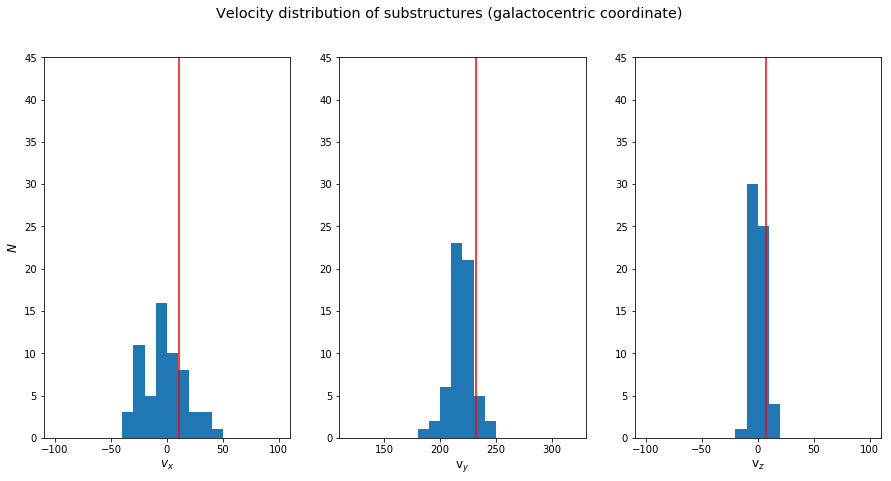

In [121]:
bins = arange(-100, 100+10, 10)
binsy= arange(120, 320+10, 10)

fig8 = p.figure(figsize=(15,7))
p.suptitle('Velocity distribution of stars (galactocentric coordinate)', fontsize='x-large')
p.subplot(131), p.hist(dh.data.vx+vx_sun, bins=bins), p.axvline(vx_sun, c='r'), p.ylim(0,30000), p.xlabel('$v_x$', fontsize='large'), p.ylabel('$N$', fontsize='large')
p.subplot(132), p.hist(dh.data.vy+vx_sun+vy_cir, bins=binsy), p.axvline(vy_cir+vy_sun, c='r'), p.ylim(0,30000), p.xlabel('v$_y$', fontsize='large')
p.subplot(133), p.hist(dh.data.vz+vx_sun, bins=bins), p.axvline(vz_sun, c='r'), p.ylim(0,30000), p.xlabel('v$_z$', fontsize='large')
p.show(fig8)

fig9 = p.figure(figsize=(15,7))
p.suptitle('Velocity distribution of substructures (galactocentric coordinate)', fontsize='x-large')
p.subplot(131), p.hist(ds1.data.vx+vx_sun, bins=bins), p.axvline(vx_sun, c='r'), p.ylim(0,45), p.xlabel('$v_x$', fontsize='large'), p.ylabel('$N$', fontsize='large')
p.subplot(132), p.hist(ds1.data.vy+vy_sun+vy_cir, bins=binsy), p.axvline(vy_cir+vy_sun, c='r'), p.ylim(0,45), p.xlabel('v$_y$', fontsize='large')
p.subplot(133), p.hist(ds1.data.vz+vz_sun, bins=bins), p.axvline(vz_sun, c='r'), p.ylim(0,45), p.xlabel('v$_z$', fontsize='large')
p.show(fig9)

# pdf = PdfPages('/net/virgo01/data/users/virgini/rockstar/RC3/output/vel-dist-gal-star-sub.pdf')
# pdf.savefig(fig1)
# pdf.savefig(fig2)
# pdf.close()

In [140]:
pdf = PdfPages('/net/virgo01/data/users/virgini/rockstar/RC3/output/vary-fb-10/velocity_distribution.pdf')
fig=[fig0, fig1, fig2, fig3, fig4, fig5, fig6, fig7, fig8, fig9]
for i in range(10):
    pdf.savefig(fig[i])
pdf.close()